In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2021-04-21 09:57:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  7.01MB/s    in 13s     

2021-04-21 09:57:47 (5.11 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
import zipfile,os,shutil
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [ ]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [ ]:
train_clean_dir = os.path.join(train_dir, 'clean')

train_messy_dir = os.path.join(train_dir, 'messy')

validation_clean_dir = os.path.join(validation_dir, 'clean')

validation_messy_dir = os.path.join(validation_dir, 'messy')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode='nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(612, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
      optimizer=tf.optimizers.Adam(),
      metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 13s - loss: 0.4096 - accuracy: 0.7900 - val_loss: 0.5623 - val_accuracy: 0.6500
Epoch 2/20
25/25 - 13s - loss: 0.5112 - accuracy: 0.7600 - val_loss: 0.5449 - val_accuracy: 0.6500
Epoch 3/20
25/25 - 13s - loss: 0.5303 - accuracy: 0.7800 - val_loss: 0.3925 - val_accuracy: 0.8000
Epoch 4/20
25/25 - 13s - loss: 0.3914 - accuracy: 0.8500 - val_loss: 0.3922 - val_accuracy: 0.7500
Epoch 5/20
25/25 - 13s - loss: 0.3861 - accuracy: 0.8500 - val_loss: 0.4970 - val_accuracy: 0.8000
Epoch 6/20
25/25 - 13s - loss: 0.3871 - accuracy: 0.8700 - val_loss: 0.4043 - val_accuracy: 0.8500
Epoch 7/20
25/25 - 13s - loss: 0.3202 - accuracy: 0.8700 - val_loss: 0.3626 - val_accuracy: 0.8500
Epoch 8/20
25/25 - 13s - loss: 0.4092 - accuracy: 0.8100 - val_loss: 0.4341 - val_accuracy: 0.8000
Epoch 9/20
25/25 - 13s - loss: 0.3867 - accuracy: 0.8300 - val_loss: 0.3825 - val_accuracy: 0.8000
Epoch 10/20
25/25 - 13s - loss: 0.4718 - accuracy: 0.7500 - val_loss: 0.3709 - val_accuracy: 0.8500
Epoch 11/

Saving kamar anak.jpg to kamar anak (4).jpg
kamar anak.jpg
clean


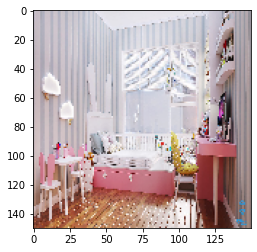

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')